#### Tutorials found here: https://www.youtube.com/watch?v=bNDRiaFyLrs

In [1]:
import tweepy
import pandas as pd

In [2]:
%run ./keys.ipynb

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

#### over here, we are trying to access the Associated Press' twitter page, and get their first tweet from their timeline
- id = twitter handle
- tweet_mode = "extended" means we get the full tweet
- .items(1) means we get one tweet

In [4]:
cursor = tweepy.Cursor(api.user_timeline, id='AP', tweet_mode = "extended").items(1)

In [5]:
cursor

#### - How to see what's in your cursor
- must iterate over cursor
- use dir to see contents of your iteration

In [6]:
for i in cursor: print(dir(i))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']


#### see full text of curosr 

In [7]:
for i in cursor:
    print(i.full_text)

#### how to do a keyword search for 'bitcoin'

In [8]:
cursor = tweepy.Cursor(api.search, q="$gme", tweet_mode = "extended").items(1)

In [9]:
for i in cursor:
    print(i.full_text)

RT @zedinstead1: Now there are 2 DDs by @pwnwtfbbq in the #SuperStonk Library of DD, Art Books and Periodicals!
#GME $GME 🦍🍌🚀💎👐

REDDIT POS…


#### analyze Associated Press' Tweets

In [10]:
number_of_tweets = 200
# store tweets in an empty list
tweets = []
likes = []
time = []

for i in tweepy.Cursor(api.user_timeline, id = "AP", tweet_mode = "extended").items(number_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [11]:
tweets

[]

In [25]:
# convert tweets to a df
df = pd.DataFrame({'tweets': tweets, 'likes': likes, 'time': time})

In [26]:
df

,tweets,likes,time
0,"@AP After making landfall in South Louisiana, ...",29,2021-08-29 23:51:02
1,Hurricane Ida's potential economic impacts: @A...,63,2021-08-29 23:10:34
2,@AP President Joe Biden pledged the federal go...,146,2021-08-29 22:45:32
3,"""A natural disaster in the midst of a pandemi...",246,2021-08-29 22:20:27
4,RT @AP_Top25: Five college football players on...,0,2021-08-29 21:25:03
...,...,...,...
195,A $100 million fix to stop a San Francisco hig...,221,2021-08-26 18:31:04
196,RT @APEntertainment: With COVID-19 cases surgi...,0,2021-08-26 18:25:15
197,Kentucky and Texas have joined a growing list ...,144,2021-08-26 18:01:06
198,South Dakota Attorney General Jason Ravnsborg ...,105,2021-08-26 17:59:32


#### get rid of retweets

In [27]:
df = df[~df.tweets.str.contains("RT")]

In [28]:
df

,tweets,likes,time
0,"@AP After making landfall in South Louisiana, ...",29,2021-08-29 23:51:02
1,Hurricane Ida's potential economic impacts: @A...,63,2021-08-29 23:10:34
2,@AP President Joe Biden pledged the federal go...,146,2021-08-29 22:45:32
3,"""A natural disaster in the midst of a pandemi...",246,2021-08-29 22:20:27
5,"""It is going to be the hottest day so far sinc...",98,2021-08-29 20:58:49
...,...,...,...
193,President Biden and Israeli Prime Minister Naf...,183,2021-08-26 19:01:03
194,"Two U.S, officials say at least 12 U.S. servic...",859,2021-08-26 18:40:30
195,A $100 million fix to stop a San Francisco hig...,221,2021-08-26 18:31:04
197,Kentucky and Texas have joined a growing list ...,144,2021-08-26 18:01:06


#### correct the indexes

In [29]:
df = df.reset_index(drop=True)

In [30]:
df

,tweets,likes,time
0,"@AP After making landfall in South Louisiana, ...",29,2021-08-29 23:51:02
1,Hurricane Ida's potential economic impacts: @A...,63,2021-08-29 23:10:34
2,@AP President Joe Biden pledged the federal go...,146,2021-08-29 22:45:32
3,"""A natural disaster in the midst of a pandemi...",246,2021-08-29 22:20:27
4,"""It is going to be the hottest day so far sinc...",98,2021-08-29 20:58:49
...,...,...,...
151,President Biden and Israeli Prime Minister Naf...,183,2021-08-26 19:01:03
152,"Two U.S, officials say at least 12 U.S. servic...",859,2021-08-26 18:40:30
153,A $100 million fix to stop a San Francisco hig...,221,2021-08-26 18:31:04
154,Kentucky and Texas have joined a growing list ...,144,2021-08-26 18:01:06


#### get most liked of AP

In [31]:
mostlike = df.loc[df.likes.nlargest(5).index]

In [32]:
mostlike

,tweets,likes,time
104,BREAKING: A judge has ruled that Florida schoo...,10403,2021-08-27 16:26:02
137,BREAKING: Supreme Court allows evictions to re...,5911,2021-08-27 01:36:25
25,BREAKING: A Taliban spokesman says a U.S. airs...,4562,2021-08-29 14:03:16
85,BREAKING: U.S. airstrike targets Islamic State...,3551,2021-08-28 01:34:23
102,BREAKING: The New Orleans mayor wants everyone...,3308,2021-08-27 17:23:54


#### NLP Tutorial

https://www.youtube.com/watch?v=MpIi4HtCiVk&t=113s

In [37]:
import matplotlib.pyplot as plt
import re
import spacy
# this spacy load is for a dict of words
nlp = spacy.load('en_core_web_lg')
import seaborn as sns

In [39]:
list_of_sentences = [sentence for sentence in df.tweets]

lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

### remove punctuation

In [40]:
lines = [re.sub(r'[^A-Za-z0-9] +', '', x) for x in lines]

lines2 = []

for word in lines:
    if word!= '':
        lines2.append(word)

#### stemming - to take a word and break it down into its root word

In [42]:
from nltk.stem.snowball import SnowballStemmer

# Snowball Stemmer requiers you ass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['@ap',
 'after',
 'make',
 'landfal',
 'in',
 'south',
 'louisiana,',
 'hurrican',
 'ida',
 'strength',
 'has',
 'drop',
 'from',
 'categori',
 '4',
 'to',
 'categori',
 '3,',
 'with',
 'maximum',
 'wind',
 'of',
 '125',
 'mph,',
 'as',
 'it',
 'inch',
 'closer',
 'to',
 'new',
 'orleans.',
 'https://t.co/spqn9luktu',
 'hurrican',
 'ida',
 'potenti',
 'econom',
 'impacts:',
 '@ap',
 '@borenbear',
 'say',
 'the',
 'power',
 'storm',
 'could',
 'caus',
 'major',
 'delay',
 'in',
 'barg',
 'traffic',
 'on',
 'the',
 'lower',
 'mississippi',
 'river.',
 'https://t.co/uvqztr1r6h',
 'https://t.co/tfnfjujzwk',
 '@ap',
 'presid',
 'joe',
 'biden',
 'pledg',
 'the',
 'feder',
 'govern',
 '"full',
 'might',
 'behind',
 'the',
 'rescu',
 'and',
 'recovery"',
 'as',
 'hurrican',
 'ida',
 'roar',
 'into',
 'louisiana,',
 'warn',
 'resid',
 'that',
 'this',
 'is',
 'a',
 '"life-threaten',
 'storm."',
 'https://t.co/7gt7fvqgct',
 'https://t.co/7jljvxwveh',
 '"a',
 'natur',
 'disast',
 'in',
 'the',


#### remove all Stop Words

In [44]:
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
        
stem2
len(stem2)

3286

#### get value counts of words in stem2

In [45]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()

# df
# df['freq'] = df.groupby(0)[0].transform('count')
# df['freq'] = df.groupby(0)[0].transform('count')
# df.sort_values(by = ('freq'), ascending = False)

In [46]:
df

u.s.                       52
hurrican                   47
new                        24
ida                        24
kabul                      24
                           ..
ismail                      1
kingdom,                    1
voting,                     1
https://t.co/igwi1z46pm     1
suspect                     1
Name: 0, Length: 1743, dtype: int64

### give frequencies of our words

In [49]:
from nltk.probability import FreqDist


freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1
freqdoctor

FreqDist({1: 1224, 2: 241, 3: 116, 4: 46, 5: 34, 6: 19, 7: 17, 8: 12, 11: 7, 9: 4, ...})

/Users/sean/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


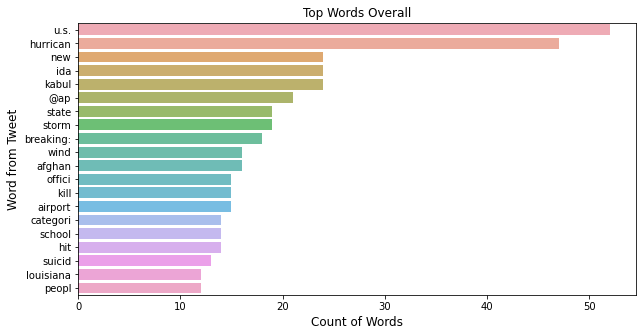

In [52]:
# this is a simple plot that shows the top 20 words being used
df = df[:20,]
plt.figure(figsize=(10, 5))
sns.barplot(df.values, df.index, alpha =0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize = 12)
plt.xlabel('Count of Words', fontsize = 12)
plt.show()

#### use spacy to break words into categories

In [53]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [54]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - '+ ' - ' + str(spacy.explain(ent.label_)))